---
### Projectr : 하루시작 데이터 품질 신뢰성 판단.
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.9 ~
### Detail : 
### Update: 
    * 2024.06.09 by pdg : 지하철역 전체에대해서 서비스 가능한지 맞지않는 숫자들에 대한 해석
        - 지하철 승하차 데이터에서뽑은 역코드 개수와 지하철 배차표 데이터에서 뽑은 역 코드 개수가 서로 다르다. 
        - 지하철 배차표에있는 데이터가 신뢰성이있다. (군자역 관련 인터넷 비교)
        - 지하철 배차표에 있는 실제존재 역 가운데 승하차 데이터에 없는 역사코드는 서비스 불가 역으로 정리해주는 함수를 만듬. 
        - 2022 년 데이터를 기준으로 함수를 만들었기때문에 2023, 24년 데이터 에서는 불일치할 가능성이 있음 
        - 배차표 테이블 지환씨 주피터 보고 참고하여 함수화하고 각 호선별 배차표 데이터 넣었을때 자동으로 배차표 테이블이
         머신러닝하기위한 포맷으로 정제되어 csv 파일로 정제하게 함. 
    
---

In [1]:
from Functions import Service

In [2]:
Service.plotSetting()

___## OS platform 한글 세팅완료 ## ___


In [3]:
#7 호선 군자역에는 몇개의 역이 있는가? 
# 일단 station info 파일 
import pandas as pd , numpy as np
####  승하차 인원 데이터가 있는 역들의 역사 정보 
station= pd.read_csv('../Data/StationInfo.csv')
#### 배차시간 데이터
subway_dispatch = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')
#서울교통공사_서울 도시철도 열차운행시각표_20240305.csv

/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T/ipykernel_11865/4185839354.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_dispatch = pd.read_csv("../Data/지하철배차시간데이터/서울교통공사_서울 도시철도 열차운행시각표_20240305.csv", encoding='euc-kr')


In [4]:
station.head() # col : 역사코드	역명	호선	환승역수

,역사코드,역명,호선,환승역수
0,150,서울역,1,2
1,426,서울역,4,2
2,151,시청,1,2
3,201,시청,2,2
4,152,종각,1,1


In [5]:
subway_dispatch.head() # 고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역

,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
0,1,2,211.0,성수,DAY,IN,0,2022,NaN,05:30:00,성수,성수
1,2,2,211.0,성수,DAY,IN,0,2026,NaN,05:40:00,성수,성수
2,3,2,211.0,성수,DAY,IN,0,2028,NaN,05:47:00,성수,성수
3,4,2,211.0,성수,DAY,IN,0,2030,NaN,05:54:00,성수,성수
4,5,2,211.0,성수,DAY,IN,0,2032,NaN,05:58:00,성수,성수


In [6]:

line7= station[station['호선']==7]
line7.reset_index(drop=True)
stations = line7['역명'].unique()
stations

array(['건대입구', '대림', '고속터미널', '노원', '군자', '태릉입구', '장암', '도봉산', '수락산',
       '마들', '중계', '하계', '공릉', '먹골', '중화', '상봉', '면목', '사가정', '용마산', '중곡',
       '어린이대공원', '뚝섬유원지', '청담', '강남구청', '학동', '논현', '반포', '내방', '이수',
       '남성', '숭실대입구', '상도', '장승배기', '신대방삼거리', '보라매', '신풍', '남구로',
       '가산디지털단지', '철산', '광명사거리', '천왕', '온수', '상동', '부평구청', '까치울', '부천시청'],
      dtype=object)

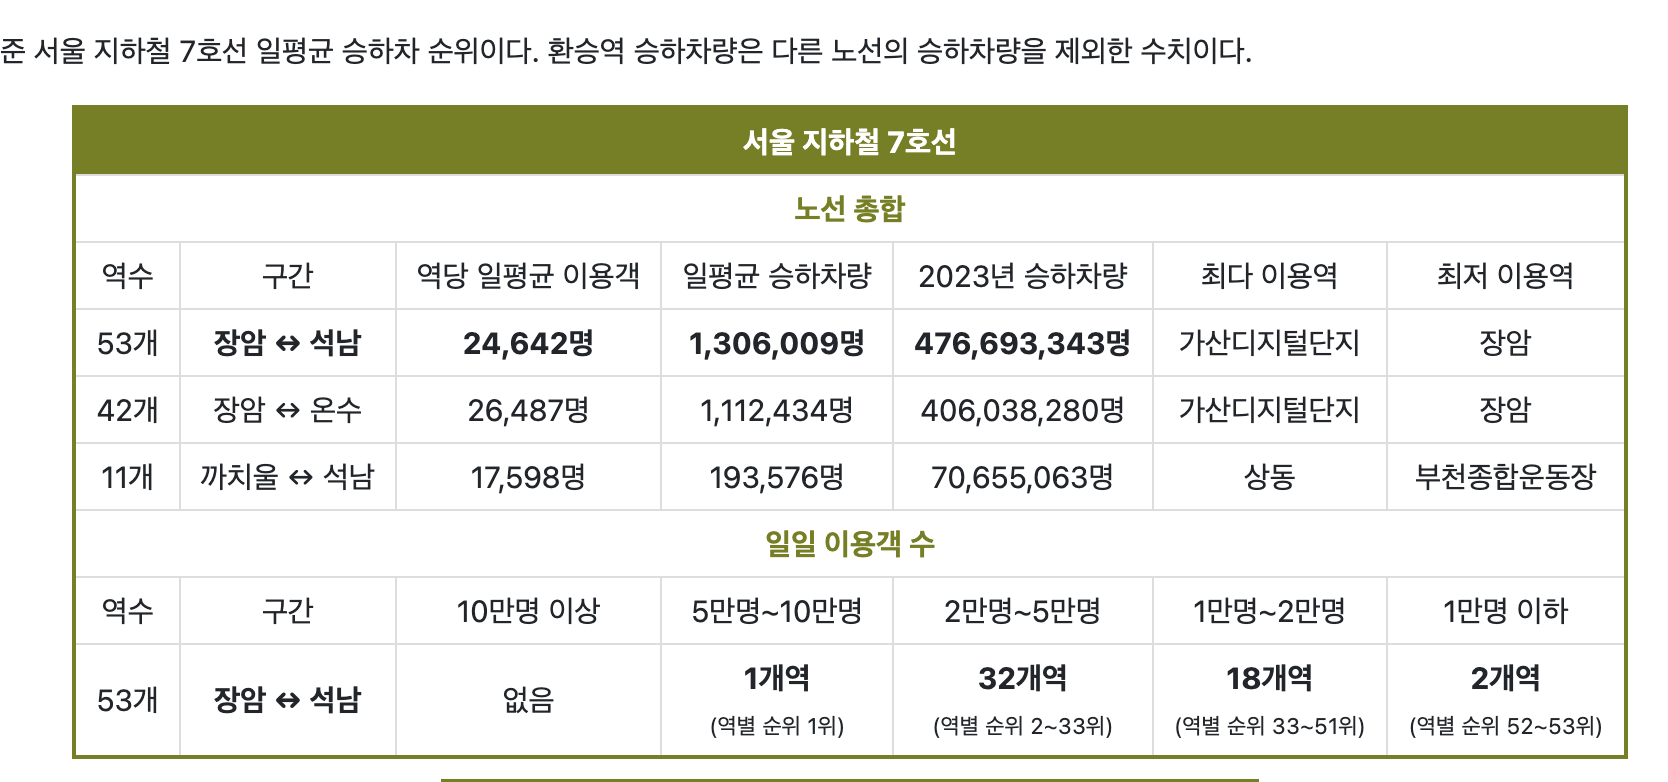

> 이걸보면 42개든지 53개든지 둘중하나여야하는데 왜 46개가 나온단 말인가?

데이터를 보면 까치울이 포함되어있는것을 알수있다. 11개의 역에 대해서 조사해보자

In [7]:
for i in range(1,8):
    _ = Service.호선당서비스불가역이름추출(i,station, subway_dispatch)

⬇--2호선 서비스불가 역사코드 . 및 역사명--⬇
 1.200 까치산 역
--------------------
⬇--3호선 서비스불가 역사코드 . 및 역사명--⬇
 1.1958 대화 역
 2.1957 주엽 역
 3.1956 정발산 역
 4.1955 마두 역
 5.1954 백석 역
 6.1953 대곡 역
 7.1952 화정 역
 8.1951 원당 역
 9.1948 원흥 역
 10.1950 삼송 역
--------------------
⬇--4호선 서비스불가 역사코드 . 및 역사명--⬇
 1.1450 선바위 역
 2.1451 경마공원 역
 3.1452 대공원 역
 4.1453 과천 역
 5.1454 정부과천청사 역
 6.1455 인덕원 역
 7.1456 평촌 역
 8.1457 범계 역
 9.1458 금정 역
 10.1751 산본 역
 11.1763 수리산 역
 12.1752 대야미 역
 13.1753 반월 역
 14.1754 상록수 역
 15.1755 한대앞 역
 16.1756 중앙 역
 17.1757 고잔 역
 18.1758 초지 역
 19.1759 안산 역
 20.1760 신길온천 역
 21.1761 정왕 역
 22.1762 오이도 역
--------------------
⬇--7호선 서비스불가 역사코드 . 및 역사명--⬇
 1.3763 석남 역
 2.3762 산곡 역
 3.2760 굴포천 역
 4.2759 삼산체육관 역
 5.2756 신중동 역
 6.2755 춘의 역
 7.2754 부천종합운동장 역
--------------------


In [8]:
print("배차 시간 제공 역 개수: ",len(subway_dispatch['역사명'].unique())) # 총 394개의 역에대한 배차 시간데이터가 있다. 
np.sort(subway_dispatch['호선'].unique()) #1, 2, 3, 4, 5, 6, 7, 8, 9  -> 9호선 데이터 까지 있음

배차 시간 제공 역 개수:  394


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
## line 별로 테이블을 따로 만든다, 
# line1_배치= subway_dispatch[subway_dispatch['호선']==1]

line_배치_dict = {}

for i in range(1,9):
    line_배치_dict[f"{i}호선"] =subway_dispatch[subway_dispatch['호선']==i]
    

In [27]:
line_배치_dict['8호선'].head()


,고유번호,호선,역사코드,역사명,주중주말,방향,급행여부,열차코드,열차도착시간,열차출발시간,출발역,도착역
146941,146942,8,2827.0,모란,DAY,UP,0,8006,NaN,05:30:00,모란,암사
146942,146943,8,2827.0,모란,DAY,UP,0,8008,NaN,05:40:00,모란,암사
146943,146944,8,2827.0,모란,DAY,UP,0,8010,NaN,05:50:00,모란,암사
146944,146945,8,2827.0,모란,DAY,UP,0,8012,NaN,06:00:00,모란,암사
146945,146946,8,2827.0,모란,DAY,UP,0,8014,NaN,06:09:00,모란,암사


In [28]:
# 배차 파일 저장 
for key in line_배치_dict.keys():
    file = Service.dispatch_table_forML(line_배치_dict[key])
    file.to_csv(f'../Data/지하철배차시간데이터/{key}배차.csv')

[1] 호선 에 대한 배차 테이블 표정제 결과
[2] 호선 에 대한 배차 테이블 표정제 결과
[3] 호선 에 대한 배차 테이블 표정제 결과
[4] 호선 에 대한 배차 테이블 표정제 결과
[5] 호선 에 대한 배차 테이블 표정제 결과
[6] 호선 에 대한 배차 테이블 표정제 결과
[7] 호선 에 대한 배차 테이블 표정제 결과
[8] 호선 에 대한 배차 테이블 표정제 결과
